170498071/170498071 [==============================] - 3s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 batch_normalization (Batch  (None, 30, 30, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 15, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       73856     
                                                       

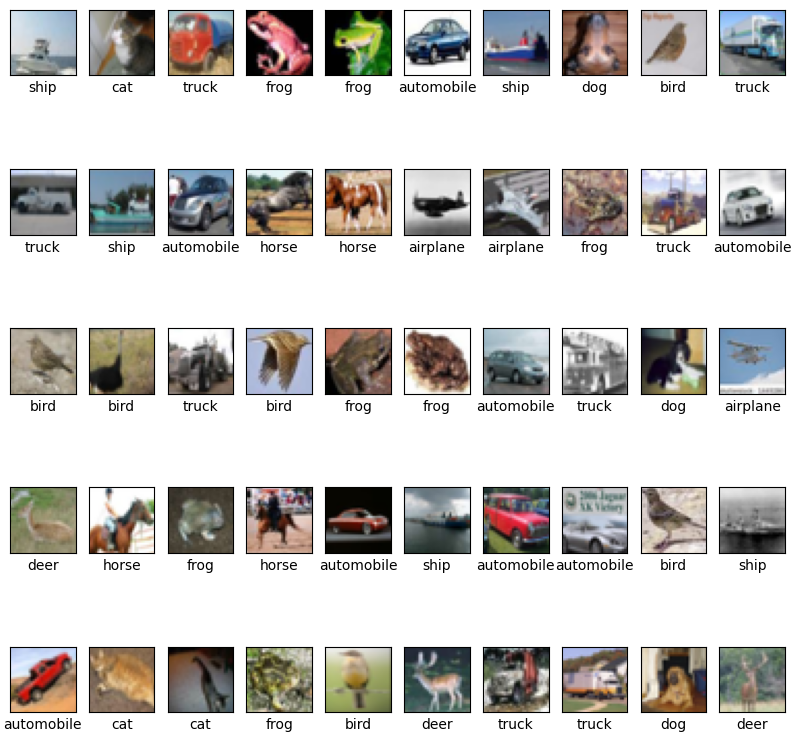

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, datasets
from tensorflow.keras.utils import to_categorical
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization

# Завантаження та розділення датасету
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[np.squeeze(y_train[i])])

# Нормалізація даних
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Перетворення міток в категоріальні дані
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Визначення моделі з архітектурою Conv2D
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(10, activation='softmax')
])

# Компіляція моделі
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Виведення інформації про модель
model.summary()

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

datagen.fit(x_train)


history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=50,  # Increase the number of epochs
                    validation_data=(x_val, y_val))

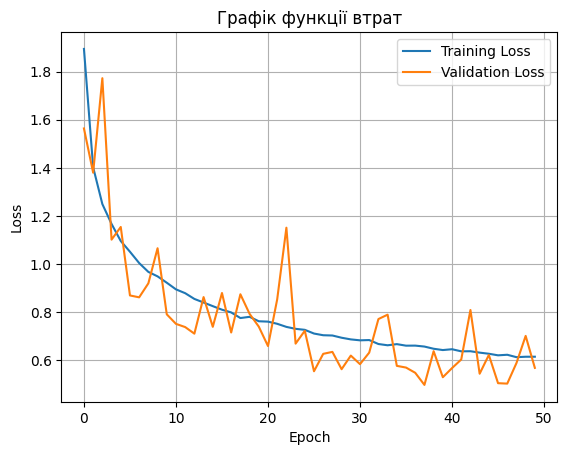

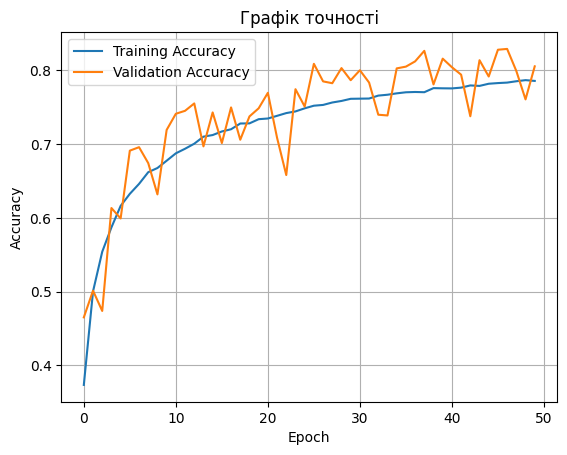

In [3]:
# Виведення графіків функції втрат та точності
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Графік функції втрат")
plt.legend()
plt.grid()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Графік точності")
plt.grid()
plt.legend()
plt.show()


In [4]:
# Оцінка точності на тестовому наборі
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_accuracy*100:.2f}%")


# Виведення статистики моделі
print("\nModel Evaluation:")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

# Статистика параметрів моделі
total_parameters = sum([np.prod(layer.get_weights()[i].shape) for layer in model.layers for i in range(len(layer.get_weights()))])

print(f"\nTotal Parameters: {total_parameters}")

# Статистика шарів моделі
for i, layer in enumerate(model.layers):
    print(f"\nLayer {i + 1}: {layer.name}")
    print(f"Number of Parameters: {layer.count_params()}")
    print(f"Input Shape: {layer.input_shape}, Output Shape: {layer.output_shape}")

313/313 - 10s - loss: 0.5871 - accuracy: 0.7999 - 10s/epoch - 33ms/step

Test Accuracy: 79.99%

Model Evaluation:
Test Loss: 0.5871
Test Accuracy: 79.99%

Total Parameters: 904586

Layer 1: conv2d
Number of Parameters: 1792
Input Shape: (None, 32, 32, 3), Output Shape: (None, 30, 30, 64)

Layer 2: batch_normalization
Number of Parameters: 256
Input Shape: (None, 30, 30, 64), Output Shape: (None, 30, 30, 64)

Layer 3: max_pooling2d
Number of Parameters: 0
Input Shape: (None, 30, 30, 64), Output Shape: (None, 15, 15, 64)

Layer 4: dropout
Number of Parameters: 0
Input Shape: (None, 15, 15, 64), Output Shape: (None, 15, 15, 64)

Layer 5: conv2d_1
Number of Parameters: 73856
Input Shape: (None, 15, 15, 64), Output Shape: (None, 13, 13, 128)

Layer 6: batch_normalization_1
Number of Parameters: 512
Input Shape: (None, 13, 13, 128), Output Shape: (None, 13, 13, 128)

Layer 7: max_pooling2d_1
Number of Parameters: 0
Input Shape: (None, 13, 13, 128), Output Shape: (None, 6, 6, 128)

Layer 8: d

In [6]:
model.save("model.h5")